In [29]:
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import animation as am
from matplotlib import cm
from kuramoto import * # import the kuramoto classes from file 

## Next, we set up and run some 2D simulations 

In [56]:
# Set up model parameters 
epsilon = 1 
gamma = 0
sigma = 0
mean_omega = 0.5

# Set up simulation parameters 
Lx = 32
Ly = 32
T = 1e3
n_batches = T

# Initialise the model and run the simulation 
model = Kuramoto2D(epsilon, gamma, sigma, mean_omega, BC='open')
model.initialise(Lx, Ly, T, n_batches, seed=1000)
model.omegas[0]=0 
model.omegas[-1]=0 
model.omegas[:, 0]=0
model.omegas[:, -1]=0
model.evolve() 

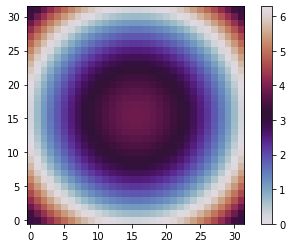

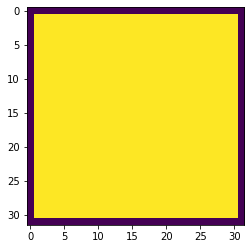

In [57]:
last_slice = model.res[-1].reshape((Lx, Ly))
plt.imshow(last_slice.T % (2*np.pi), origin='lower', vmin=0, vmax=2*np.pi, cmap='twilight')
plt.colorbar() 
plt.show() 

plt.imshow(model.omegas)
plt.show() 

## Make movie of the 2D simulation 

In [58]:
# Reshape the result into 2D shape 
N = 100 # number of frames to use in making the movie 
phase_evolution = model.res.reshape((model.n_batches, model.Lx, model.Ly))
phase_evolution = phase_evolution[-N:]

# Set up figure plotting 
fig = plt.figure(figsize=(13, 10))
low, high = 0, 2*np.pi 

# Plot the movie one snapshot at a time 
ims = []
im = plt.imshow(phase_evolution[0].T, vmin=low, vmax=high, animated=True, cmap='twilight')
plt.title(r'$\sigma={}, \epsilon ={}, \gamma ={}$'.format(sigma, epsilon, gamma))
plt.axis('off')
cbar = plt.colorbar(im, shrink=0.6)
cbar.set_ticks([0, 2*np.pi])
cbar.set_ticklabels([r'0', r'$2\pi$'])
plt.tight_layout()
for i in range(N):
    xy = phase_evolution[i].T % (2*np.pi)
    im = plt.imshow(xy, vmin=low, vmax=high, animated=True, cmap='twilight')
    plt.axis('off')
    ims.append([im])
ani = am.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=1000)
mywriter = am.FFMpegWriter()
ani.save("movie.mp4", writer=mywriter)
plt.close()


## Now you will find a video called "movie.mp4" in the same folder